In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import aif360
from aif360.algorithms.preprocessing import DisparateImpactRemover

In [2]:
##create OHE method for step 4
def encoding(dframe, feat):
    dummies = pd.get_dummies(dframe[[feat]])
    res = pd.concat([dframe, dummies], axis=1)
    res = res.drop([feat], axis=1)
    return(res)

# Step 1
#### 1) Which dataset did you select?
Loan Eligibility for Dream Housing Finance company (https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About)
<br>
*Note - You will need to register on website to get access to dataset*
</br>

### Dataset Information:


Loan_ID =	Unique Loan ID
<br>
Gender = Male/ Female
<br>
Married	= Applicant married (Y/N)
<br>
Dependents = Number of dependents
<br>
Education = Applicant Education (Graduate/ Under Graduate)
<br>
Self_Employed = Self employed (Y/N)
<br>
ApplicantIncome = Applicant income
<br>
CoapplicantIncome = Coapplicant income
<br>
LoanAmount = Loan amount in thousands
<br>
Loan_Amount_Term = Term of loan in months
<br>
Credit_History = credit history meets guidelines
<br>
Property_Area = Urban/ Semi Urban/ Rural
<br>
Loan_Status = (Target) Loan approved (Y/N)

In [3]:
df = pd.read_csv("train_ctrUa4K.csv")

#### 2) Which regulated domain does your dataset belong to?
Credit (Equal Credit Opportunity Act)

In [4]:
df.shape

(614, 13)

#### 3) How many observations are in the dataset?
614

#### 4) How many variables in the dataset?
13

#### 5) Which variables did you select as your dependent variables?
1. LoanAmount - Loan amount granted (turned to binary dependent variable <=300 = 0 and >300 = 1)
2. Loan_Status - Loan approval status 

#### 6) How many and which variables in the dataset are associated with a legally recognized protected class? Which legal precedence/law (as discussed in the lectures) does each protected class fall under?
There are 2 variables associated with legally recognized protected classes: 

|# | Protected Class | Legal Precedence |
| -----------|----------- | ----------- |
| 1 |Sex - Gender | Equal Pay Act of 1963; <br> Civil Rights Act of 1964, 1991 </br> |
| 2 |Familial Status - Married | Civil Rights Act of 1968|


# Step 2

#### 2.1) Identify the members associated with your protected class variables and group together into a subset of membership categories as appropriate. Provide Table documenting the relationship between members and membership categories for each protected class variable

In [5]:
print(df.groupby('Gender').size())

Gender
Female    112
Male      489
dtype: int64


In [6]:
print(df.groupby('Married').size())

Married
No     213
Yes    398
dtype: int64


| Protected Class | Members |
| ----------- | ----------- |
| Gender | Male, Female |
| Familian Status (Married) | Yes, No |

#### 2.2) Discretize the values associated with your dependent variables into discrete categories/numerical values as appropriate. Provide Table documenting the relationship between values and discrete categories/numerical values associated with your dependent variables

In [7]:
#Gender mapping
dict_gender = {}
dict_gender['Male'] = 1
dict_gender['Female'] = 2

In [8]:
df['Gender_num'] = df['Gender'].dropna().apply (lambda row: dict_gender[row])

<center>
Values in Dependent Variable - Gender
</center>

| Discrete Category | Numerical Values | 
| ----------- | ----------- |
| Male | 1 | 
| Female | 2 |

In [9]:
#Married mapping
dict_married = {}
dict_married['Yes'] = 1
dict_married['No'] = 2

In [10]:
df['Married_num'] = df['Married'].dropna().apply (lambda row: dict_married[row])

<center>
Values in Dependent Variable - Married
</center>

| Discrete Category | Numerical Values |
| ----------- | ----------- |
| Yes | 1 |
| No | 2 |

In [11]:
#Loan Status mapping
dict_loanstatus = {}
dict_loanstatus['N'] = 0
dict_loanstatus['Y'] = 1

In [12]:
df['LoanStatus_num'] = df['Loan_Status'].dropna().apply (lambda row: dict_loanstatus[row])

In [13]:
##modify dependent variable column LoanAmount to be binary, if greater than 300 then 1, below 300 then 0
df['bin_loanamount'] = np.where(df['LoanAmount']>300, 1, 0)

In [14]:
###test and drop NaN values in dependent variable (22 NaN values removed)
print(df['LoanAmount'].isnull().sum(axis = 0))
df = df.dropna(subset=['LoanAmount'])

22


<center>
Values in independent Variable - Loan Amount
</center>

| Discrete Category | Numerical Values |
| ----------- | ----------- |
| <= 300 | 0 |
| > 300 | 1 |

<center>
Values in independent Variable - Loan Status
</center>

| Discrete Category | Numerical Values |
| ----------- | ----------- |
| N | 0 |
| Y | 1 |

#### 2.3) Compute the frequency of each membership category associated with each of your protected class variables from Step 2.1 Show table providing the computed frequency values for the membership categories each protected class variable. 

<center>
<b>and</b>
</center>

#### 2.4) Create a histogram for each protected class variable that graphs the frequency values of its membership categories as a function of the dependent variables. Show histograms derived. 

Following are four pairs of tables and histograms to support each of below: 
1. Protected Variable: Gender - Dependent Variable: Loan Amount 
2. Protected Variable: Gender - Dependent Variable: Loan Status
3. Protected Variable: Married - Dependent Variable: Loan Amount
4. Protected Variable: Married - Dependent Variable: Loan Status

#### 2.3.1 & 2.4.1) Protected Variable: Gender - Dependent Variable: Loan Amount

| Protected Class Variable | Fequency |
| ----------- | ----------- |
| **Gender - Male** | **Frequency of Male** |
|               | LoanAmount <=300: 446 |
|               | LoanAmount >300: 24 |
| **Gender - Female** | **Frequency of Female** |
|               | LoanAmount <=300: 106 |
|               | LoanAmount >300: 3 |

Text(0, 0.5, 'Gender Frequency')

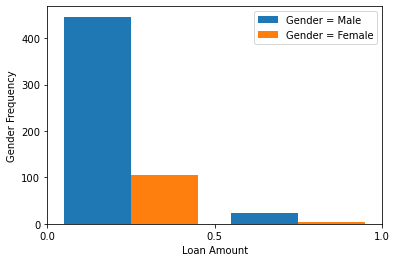

In [15]:
Gender_Male = df[df['Gender'] == 'Male']
Gender_Female = df[df['Gender'] == 'Female']
LoanAmount_Gender,bins,label = plt.hist([Gender_Male['bin_loanamount'], Gender_Female['bin_loanamount']], bins = 2, label=['Gender = Male', 'Gender = Female'])
plt.legend(loc='upper right')
plt.xlabel('Loan Amount')
plt.xticks(bins)
plt.ylabel('Gender Frequency')

In [16]:
LoanAmount_Gender

array([[446.,  24.],
       [106.,   3.]])

#### 2.3.2 & 2.4.2) Protected Variable: Gender - Dependent Variable: Loan Status

| Protected Class Variable | Frequency |
| ----------- | ----------- |
| **Gender - Male** | LoanStatus - Yes: 330|
|               | LoanStatus - No: 140|
| **Gender - Female**  | LoanStatus - Yes: 73|
|               | LoanStatus - No: 36|

Text(0, 0.5, 'Gender Frequency')

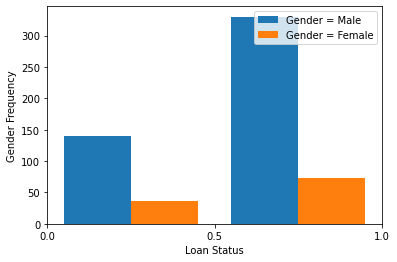

In [17]:
Gender_Male = df[df['Gender'] == 'Male']
Gender_Female = df[df['Gender'] == 'Female']
LoanStatus_Gender,bins,label = plt.hist([Gender_Male['LoanStatus_num'], Gender_Female['LoanStatus_num']], bins = 2, label=['Gender = Male', 'Gender = Female'])
plt.legend(loc='upper right')
plt.xlabel('Loan Status')
plt.xticks(bins)
plt.ylabel('Gender Frequency')

In [18]:
LoanStatus_Gender

array([[140., 330.],
       [ 36.,  73.]])

#### 2.3.3 & 2.4.3) Protected Variable: Married - Dependent Variable: Loan Amount

| Protected Class Variable | Fequency |
| ----------- | ----------- |
| **Married - Yes** | **Frequency of Married** |
|               | LoanAmount <=300: 362 |
|               | LoanAmount >300: 22 |
| **Married - No** | **Frequency of Unmarried** |
|               | LoanAmount <=300: 199 |
|               | LoanAmount >300: 7 |

Text(0, 0.5, 'Married Frequency')

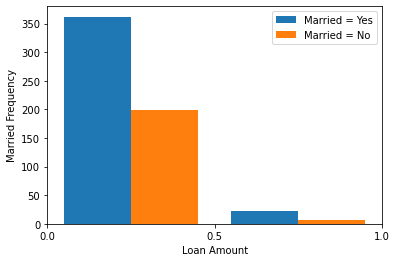

In [19]:
Married_Yes = df[df['Married'] == 'Yes']
Married_No = df[df['Married'] == 'No']
LoanAmount_MaritalStatus,bins,label = plt.hist([Married_Yes['bin_loanamount'], Married_No['bin_loanamount']], bins = 2, label=['Married = Yes', 'Married = No'])
plt.legend(loc='upper right')
plt.xlabel('Loan Amount')
plt.xticks(bins)
plt.ylabel('Married Frequency')

In [20]:
LoanAmount_MaritalStatus

array([[362.,  22.],
       [199.,   7.]])

#### 2.3.4 & 2.4.4) Protected Variable: Married - Dependent Variable: Loan Status

| Protected Class Variable | Frequency |
| ----------- | ----------- |
| **Married - Yes** | LoanStatus - Yes: 278|
|               | LoanStatus - No: 106|
| **Married - No**  | LoanStatus - Yes: 131|
|               | LoanStatus - No: 75|

Text(0, 0.5, 'Married Frequency')

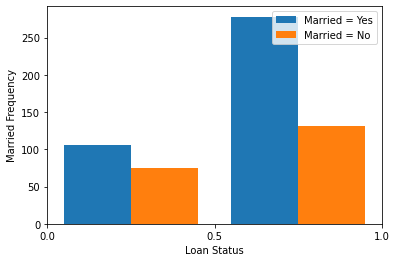

In [21]:
Married_Yes = df[df['Married'] == 'Yes']
Married_No = df[df['Married'] == 'No']
LoanStatus_MaritalStatus,bins,label = plt.hist([Married_Yes['LoanStatus_num'], Married_No['LoanStatus_num']], bins = 2, label=['Married = Yes', 'Married = No'])
plt.legend(loc='upper right')
plt.xlabel('Loan Status')
plt.xticks(bins)
plt.ylabel('Married Frequency')

In [22]:
LoanStatus_MaritalStatus

array([[106., 278.],
       [ 75., 131.]])

# Step 3

#### 3.1) Based on your dataset, identify the privileged/unprivileged groups associated with each of your protected class variables 

**Protected Class Variable: Gender** 
1. Privileged - Male 
2. Unprivileged - Female

**Protected Class Variable: Familial Status/Married** 
1. Privileged - Married (Married = Y)
2. Unprivileged - Unmarried (Married = N)



#### 3.2) For each protected class variable, select two fairness metrics and compute the fairness metrics associated with your privileged/unprivileged groups as a function of each of your two dependent variables.  You may choose any reasonable threshold in order to generate a baseline for comparison using the fairness metrics.  

Two fairness metrics selected include:
1. Disparate Impact 
2. Statistical Parity 

Below, you will find 8 plots: 
1. Gender <> Disparate Impact <> Loan Status 
2. Gender <> Disparate Impact <> Loan Amount 
3. Gender <> Statistical Parity <> Loan Status 
4. Gender <> Statistical Parity <> Loan Amount 
5. Familial Status <> Disparate Impact <> Loan Status 
6. Familial Status <> Disparate Impact <> Loan Amount 
7. Familial Status <> Statistical Parity <> Loan Status 
8. Familial Status <> Statistical Parity <> Loan Amount 




#### Gender and Disparate Impact Metric

In [23]:
gender_m_df = df[df['Gender']=='Male']
privileged_gen = gender_m_df.shape[0]
print("Num of privileged gender = " + str(privileged_gen))

gender_f_df = df[df['Gender']=='Female']
unprivileged_gen = gender_f_df.shape[0]
print("Num of unprivileged gender = " + str(unprivileged_gen))

Num of privileged gender = 470
Num of unprivileged gender = 109


In [24]:
unpriv_outcomes_Gen_LS = gender_f_df[gender_f_df['Loan_Status'] == 'Y'].shape[0]
unpriv_ratio_Gen_LS = unpriv_outcomes_Gen_LS/unprivileged_gen
unpriv_ratio_Gen_LS

0.6697247706422018

In [25]:
unpriv_outcomes_Gen_LA = gender_f_df[gender_f_df['bin_loanamount'] == 1].shape[0]
unpriv_ratio_Gen_LA = unpriv_outcomes_Gen_LA/unprivileged_gen
unpriv_ratio_Gen_LA

0.027522935779816515

In [26]:
priv_outcomes_Gen_LS = gender_m_df[gender_m_df['Loan_Status'] == 'Y'].shape[0]
priv_ratio_Gen_LS = priv_outcomes_Gen_LS/privileged_gen
priv_ratio_Gen_LS

0.7021276595744681

In [27]:
priv_outcomes_Gen_LA = gender_m_df[gender_m_df['bin_loanamount'] == 1].shape[0]
priv_ratio_Gen_LA = priv_outcomes_Gen_LA/privileged_gen
priv_ratio_Gen_LA

0.05106382978723404

In [28]:
disparate_impact_Gen_LS = unpriv_ratio_Gen_LS/priv_ratio_Gen_LS
print("Disparate Impact for gender against Loan Status (Original Dataset): ", disparate_impact_Gen_LS)

Disparate Impact for gender against Loan Status (Original Dataset):  0.953850430914651


In [29]:
disparate_impact_Gen_LA = unpriv_ratio_Gen_LA/priv_ratio_Gen_LA
print("Disparate Impact for gender against Loan Amount (Original Dataset): ", disparate_impact_Gen_LA)

Disparate Impact for gender against Loan Amount (Original Dataset):  0.5389908256880734


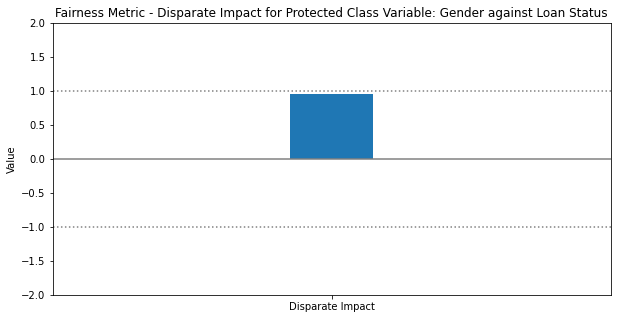

In [30]:
#Disparate Impact for gender against Loan Status (Original Dataset):  0.953850430914651
# creating the dataset
data = {'Disparate Impact':0.95385}
metric = list(data.keys())
value = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Disparate Impact for Protected Class Variable: Gender against Loan Status")
plt.show()

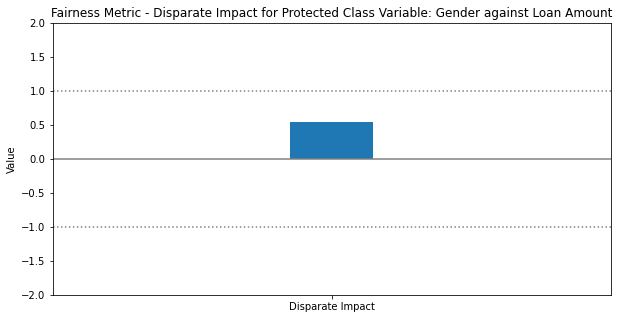

In [31]:
#Disparate Impact for gender against Loan Amount (Original Dataset):  0.5389908256880734
# creating the dataset
data = {'Disparate Impact':0.53899}
metric = list(data.keys())
value = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Disparate Impact for Protected Class Variable: Gender against Loan Amount")
plt.show()

#### Gender and Statistical Parity Metric

In [32]:
statistical_parity_Gen_LS = unpriv_ratio_Gen_LS - priv_ratio_Gen_LS
print("Statistical Parity for gender against Loan Status (Original Dataset): ", statistical_parity_Gen_LS)

Statistical Parity for gender against Loan Status (Original Dataset):  -0.03240288893226628


In [33]:
statistical_parity_Gen_LA = unpriv_ratio_Gen_LA - priv_ratio_Gen_LA
print("Statistical Parity for gender against Loan Amount (Original Dataset): ", statistical_parity_Gen_LA)

Statistical Parity for gender against Loan Amount (Original Dataset):  -0.023540894007417525


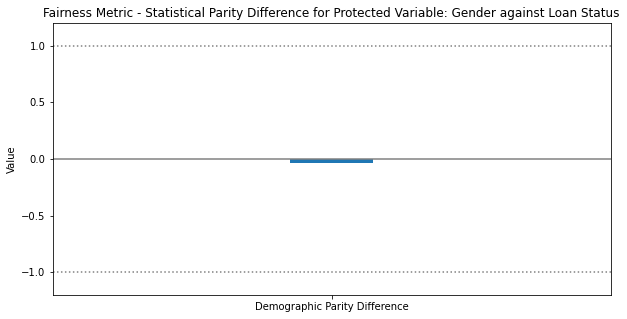

In [34]:
#Statistical Parity for gender against Loan Status (Original Dataset):  -0.03240288893226628
# creating the dataset
data = {'Demographic Parity Difference':-0.032402}
metric = list(data.keys())
value = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
     
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-1.2, 1.2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Statistical Parity Difference for Protected Variable: Gender against Loan Status")
plt.show()

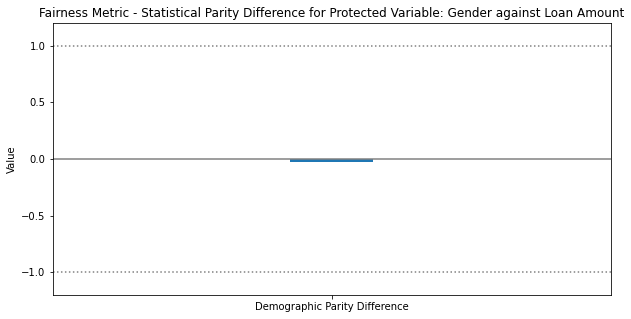

In [35]:
#Statistical Parity for gender against Loan Amount (Original Dataset):  -0.023540894007417525
# creating the dataset
data = {'Demographic Parity Difference':-0.02354}
metric = list(data.keys())
value = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
     
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-1.2, 1.2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Statistical Parity Difference for Protected Variable: Gender against Loan Amount")
plt.show()

#### Familial Status (Married/Unmarried) and Disparate Impact Metric

In [36]:
married_df = df[df['Married']=='Yes']
married_priv = married_df.shape[0]
print("Num of privileged - married = " + str(married_priv))

umarried_df = df[df['Married']=='No']
unmarried_unpriv = umarried_df.shape[0]
print("Num of unprivileged - unmarried = " + str(unmarried_unpriv))

Num of privileged - married = 384
Num of unprivileged - unmarried = 206


In [37]:
unmarried_outcomes_LS = umarried_df[umarried_df['Loan_Status'] == 'Y'].shape[0]
unpriv_married_ratio_LS = unmarried_outcomes_LS/unmarried_unpriv
unpriv_married_ratio_LS

0.6359223300970874

In [38]:
unmarried_outcomes_LA = umarried_df[umarried_df['bin_loanamount'] == 1].shape[0]
unpriv_married_ratio_LA = unmarried_outcomes_LA/unmarried_unpriv
unpriv_married_ratio_LA

0.03398058252427184

In [39]:
married_outcomes_LS = married_df[married_df['Loan_Status'] == 'Y'].shape[0]
priv_married_ratio_LS = married_outcomes_LS/married_priv
priv_married_ratio_LS

0.7239583333333334

In [40]:
married_outcomes_LA = married_df[married_df['bin_loanamount'] == 1].shape[0]
priv_married_ratio_LA = married_outcomes_LA/married_priv
priv_married_ratio_LA

0.057291666666666664

In [41]:
disparate_impact_married_LS = unpriv_married_ratio_LS/priv_married_ratio_LS
print("Disparate Impact for Marriage against Loan Status (Original Dataset): ", disparate_impact_married_LS)

Disparate Impact for Marriage against Loan Status (Original Dataset):  0.8783963120765523


In [42]:
disparate_impact_married_LA = unpriv_married_ratio_LA/priv_married_ratio_LA
print("Disparate Impact for Marriage against Loan Amount (Original Dataset): ", disparate_impact_married_LA)

Disparate Impact for Marriage against Loan Amount (Original Dataset):  0.5931156222418358


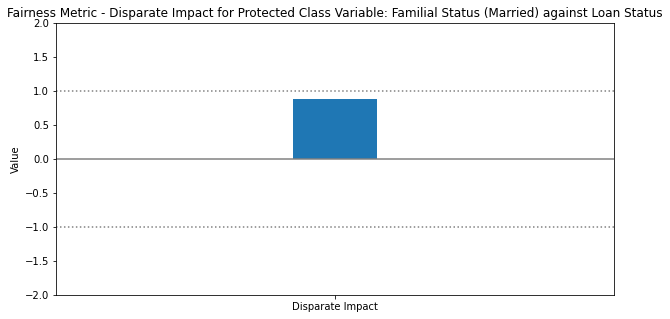

In [43]:
#Disparate Impact for Marriage against Loan Status (Original Dataset):  0.8783963120765523
# creating the dataset
data = {'Disparate Impact':0.87839}
metric = list(data.keys())
value = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Disparate Impact for Protected Class Variable: Familial Status (Married) against Loan Status")
plt.show()

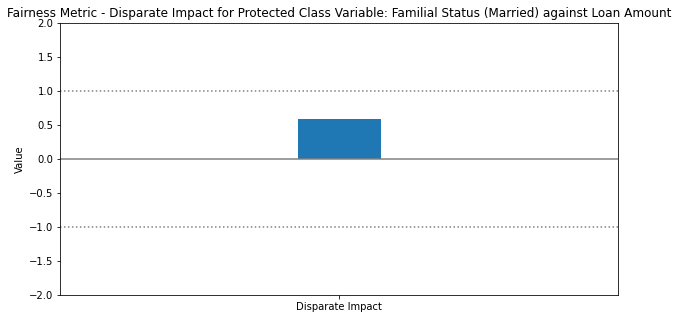

In [44]:
#Disparate Impact for Marriage against Loan Amount (Original Dataset):  0.5931156222418358
# creating the dataset
data = {'Disparate Impact':0.593115}
metric = list(data.keys())
value = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Disparate Impact for Protected Class Variable: Familial Status (Married) against Loan Amount")
plt.show()

#### Familial Status (Married) and Statistical Parity Metric

In [45]:
statistical_parity_married_LS = unpriv_married_ratio_LS - priv_married_ratio_LS
print("Statistical Parity difference for Marriage against Loan Status (Original Dataset): ", statistical_parity_married_LS)

Statistical Parity difference for Marriage against Loan Status (Original Dataset):  -0.08803600323624594


In [46]:
statistical_parity_married_LA = unpriv_married_ratio_LA - priv_married_ratio_LA
print("Statistical Parity difference for Marriage against Loan Amount (Original Dataset): ", statistical_parity_married_LA)

Statistical Parity difference for Marriage against Loan Amount (Original Dataset):  -0.02331108414239482


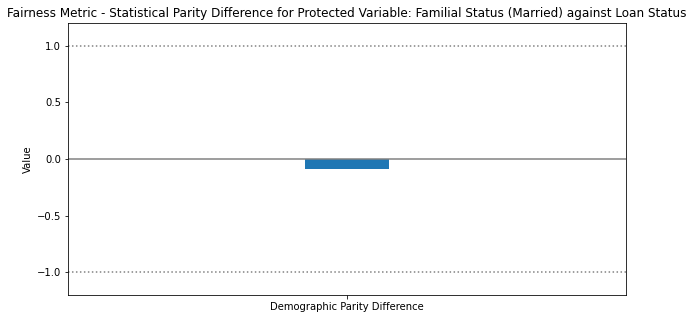

In [47]:
#Statistical Parity difference for Marriage against Loan Status (Original Dataset):  -0.08803600323624594
# creating the dataset
data = {'Demographic Parity Difference':-0.08803}
metric = list(data.keys())
value = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-1.2, 1.2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Statistical Parity Difference for Protected Variable: Familial Status (Married) against Loan Status")
plt.show()

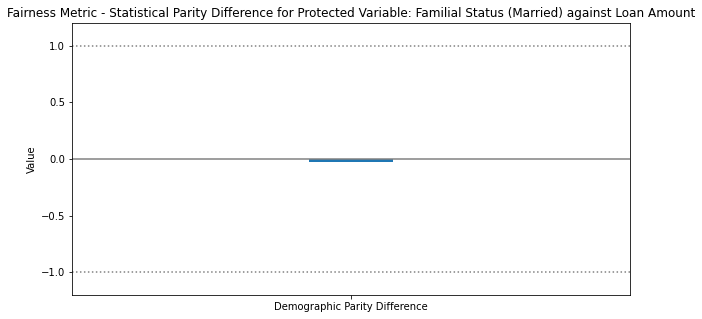

In [48]:
#Statistical Parity difference for Marriage against Loan Amount (Original Dataset):  -0.02331108414239482
# creating the dataset
data = {'Demographic Parity Difference':-0.023311}
metric = list(data.keys())
value = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-1.2, 1.2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Statistical Parity Difference for Protected Variable: Familial Status (Married) against Loan Amount")
plt.show()

#### 3.3) Select a pre-processing bias mitigation algorithm to transform the original dataset (e.g. Reweighting, Disparate Impact Remover, etc.) as a function of one of your dependent variables 

In [49]:
## Transform dataset using Diparate Impact Remover, for use in in Step 4.2.
##re copy the df for transforming purposes
dft = pd.read_csv("train_ctrUa4K.csv")

In [50]:
##drop nulls
dft = dft.dropna(axis = 0)

In [51]:
##convert to numerical outside of OHE (one hot encoding)
dft['LoanStat'] = np.where(dft['Loan_Status'] == 'Y',1,0)
dft['Gender'] = np.where(dft['Gender'] == 'Male',1,0)
dft['Married'] = np.where(dft['Married'] == 'Yes',1,0)

In [52]:
##drop irrelevant columns
dft = dft.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [53]:
##convert One Hot Encoding
categorical = ['Dependents','Education','Self_Employed','Property_Area']
for feats in categorical:
    dft= encoding(dft,feats)

In [54]:
##create a binary label dataset from dft to feed disparate impact remover
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=dft,
    label_names=['LoanStat'],
    protected_attribute_names=['Gender','Married'])

In [55]:
##transform dataset using disparate impact remover from AIF360
di = DisparateImpactRemover(repair_level = 1.0)
dataset_transf_train = di.fit_transform(binaryLabelDataset)
transformed = dataset_transf_train.convert_to_dataframe()[0]

In [56]:
transformed.head()

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanStat
1,1.0,1.0,4160.0,1516.0,105.0,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,2645.0,0.0,53.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,1.0,2330.0,2302.0,100.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,4666.0,0.0,112.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5,1.0,1.0,4408.0,3440.0,194.0,360.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


#### 3.4) Use the two fairness metrics identified in 3.2 and compute the fairness metrics on the transformed dataset 


In [57]:
dft = transformed

#### Disparate Impact & Statistical Parity on transformed dataset for Gender

In [58]:
##Need to do these steps but with the transformed dataset
#3.4 Disparate Impact & Statistical Parity on transformed dataset (NEED TO RE-NAME VARIABLES)
gender_m_dft = dft[dft['Gender']==1]
tprivileged = gender_m_dft.shape[0]
gender_f_dft = dft[dft['Gender']==1]
tunprivileged = gender_f_dft.shape[0]

In [59]:
t_unpriv_outcomes = gender_f_dft[gender_f_dft['LoanStat'] == 1].shape[0]
t_unpriv_ratio = t_unpriv_outcomes/tunprivileged
t_unpriv_ratio

0.7055837563451777

In [60]:
t_priv_outcomes = gender_m_dft[gender_m_dft['LoanStat'] == 1].shape[0]
t_priv_ratio = t_priv_outcomes/privileged_gen
t_priv_ratio

0.5914893617021276

In [61]:
t_disparate_impact = t_unpriv_ratio/t_priv_ratio
print("Disparate Impact for gender against Loan Status on Transformed Dataset: ", t_disparate_impact)

Disparate Impact for gender against Loan Status on Transformed Dataset:  1.1928934010152286


In [62]:
##Statistical Parity
t_statistical_parity = t_unpriv_ratio - t_priv_ratio
print("Statistical Parity for gender against Loan Status on Transformed Dataset: ", t_statistical_parity)

Statistical Parity for gender against Loan Status on Transformed Dataset:  0.11409439464305005


#### Disparate Impact & Statistical Parity on transformed dataset for Marriage

In [63]:
married_dft = dft[dft['Married']==1]
tmarried_priv = married_dft.shape[0]
unmarried_dft = dft[dft['Married']==0]
tunmarried_unpriv = unmarried_dft.shape[0]

In [64]:
t_unmarried_outcomes = unmarried_dft[unmarried_dft['LoanStat'] == 1].shape[0]
t_unpriv_married_ratio = t_unmarried_outcomes/tunmarried_unpriv
t_unpriv_married_ratio

0.621301775147929

In [65]:
t_married_outcomes = married_dft[married_dft['LoanStat'] == 1].shape[0]
t_priv_married_ratio = t_married_outcomes/tmarried_priv
t_priv_married_ratio

0.729903536977492

In [66]:
##Disparate Impact
t_disparate_impact_married = t_unpriv_married_ratio/t_priv_married_ratio
print("Disparate Impact for Marriage against Loan Status on Transformed Dataset: ", t_disparate_impact_married)

Disparate Impact for Marriage against Loan Status on Transformed Dataset:  0.8512108020749158


In [67]:
##Statistical Parity
t_statistical_parity_married = t_unpriv_married_ratio - t_priv_married_ratio
print("Statistical Parity for Marriage against Loan Status on Transformed Dataset: ", t_statistical_parity_married)

Statistical Parity for Marriage against Loan Status on Transformed Dataset:  -0.10860176182956305


In [68]:
## Original Dataset
print("Disparate Impact for Gender against Loan Status (Original Dataset): ", disparate_impact_Gen_LS)
print("Statistical Parity for Gender against Loan Status (Original Dataset): ", statistical_parity_Gen_LS)

print("Disparate Impact for Marriage against Loan Status (Original Dataset): ", disparate_impact_married_LS)
print("Statistical Parity for Marriage against Loan Status (Original Dataset): ", statistical_parity_married_LS)

Disparate Impact for Gender against Loan Status (Original Dataset):  0.953850430914651
Statistical Parity for Gender against Loan Status (Original Dataset):  -0.03240288893226628
Disparate Impact for Marriage against Loan Status (Original Dataset):  0.8783963120765523
Statistical Parity for Marriage against Loan Status (Original Dataset):  -0.08803600323624594


In [69]:
## Transformed Dataset
print("Disparate Impact for Gender against Loan Status (Transformed Dataset): ", t_disparate_impact)
print("Statistical Parity for Gender against Loan Status (Transformed Dataset): ", t_statistical_parity)

print("Disparate Impact for Marriage against Loan Status (Transformed Dataset): ", t_disparate_impact_married)
print("Statistical Parity for Marriage against Loan Status (Transformed Dataset): ", t_statistical_parity_married)

Disparate Impact for Gender against Loan Status (Transformed Dataset):  1.1928934010152286
Statistical Parity for Gender against Loan Status (Transformed Dataset):  0.11409439464305005
Disparate Impact for Marriage against Loan Status (Transformed Dataset):  0.8512108020749158
Statistical Parity for Marriage against Loan Status (Transformed Dataset):  -0.10860176182956305


| Fairness Metric | Gender - Original Dataset | Gender - Transformed Dataset | Married - Original Dataset | Married - Transformed Dataset |
| ----------- | ----------- | ----------- | ----------- | ----------- |
|Disparate Impact| 0.95385 | 1.19289 | 0.87839 | 0.85121 |
|Statistical Parity Difference | -0.03240 | 0.11409 | -0.08803 | -0.10860

# Step 4 (Option A)

#### 4.1) Randomly split your original dataset into training and testing datasets

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [71]:
##get original columns
df_ml_orig = pd.read_csv("train_ctrUa4K.csv")

##split data into a test and train dataset 70/30
training_orig, testing_orig = train_test_split(df_ml_orig, test_size=0.3, random_state=25)

print(f"Total training: {training_orig.shape[0]}")
print(f"Total testing: {testing_orig.shape[0]}")

Total training: 429
Total testing: 185


#### 4.2) Randomly split your transformed dataset into training and testing datasets (from step 3.3) <span style="color:red"></span>

In [72]:
##split the transformed dataset
training_trans, testing_trans = train_test_split(transformed, test_size=0.3, random_state=25)

print(f"Total training: {training_trans.shape[0]}")
print(f"Total testing: {testing_trans.shape[0]}")

Total training: 336
Total testing: 144


#### 4.3) Train a classifier using the original training dataset from Step 4.1; select one of your dependent variables as  the output label to train your classifier.

In [73]:
##create dependent variable into binary column
df_ml_orig['LoanStat'] = np.where(df_ml_orig['Loan_Status'] == 'Y',1,0)

In [74]:
##drop variables not needed for LogReg
df_ml_orig = df_ml_orig.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [75]:
##test null vals
print(df_ml_orig.isnull().sum(axis = 0))

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
LoanStat              0
dtype: int64


In [76]:
##due to the short amount of null values out of 614, we can drop nulls without significant impact 
#in Protected Vars Gender and Married 
#df2 = df2.dropna(axis = 0, subset=['Gender','Married'])
df_ml_orig = df_ml_orig.dropna(axis = 0)
df_ml_orig.shape

(480, 12)

In [77]:
#Change Data Types 
#Numeric:'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'
#Categorical:'Gender','Married','Dependents','Education','Self_Employed','Property_Area'
#Dependent: LoanStat
df_ml_orig = df_ml_orig.infer_objects()

In [78]:
categorical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for feats in categorical:
    df_ml_orig= encoding(df_ml_orig,feats)

In [79]:
##split data into a test and train dataset 70/20
x = df_ml_orig.drop('LoanStat', axis = 1)
y = df_ml_orig['LoanStat']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,  random_state = 25)

In [80]:
#Create a classifier RF
clf = RandomForestClassifier(n_estimators = 115)

In [81]:
#fit training data to the classifier
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=115)

In [82]:
#use classifier to predict 
y_pred = clf.predict(x_test)

In [83]:
#get important features, not necessary for the project, but always helps understand the dataset better. 
features = list(x)
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

Credit_History             0.195071
ApplicantIncome            0.192058
LoanAmount                 0.179921
CoapplicantIncome          0.095802
Loan_Amount_Term           0.046725
Property_Area_Semiurban    0.030280
Property_Area_Rural        0.030125
Married_Yes                0.021602
Married_No                 0.020806
Dependents_1               0.020647
Dependents_0               0.018901
Education_Not Graduate     0.018768
Property_Area_Urban        0.018604
Gender_Female              0.018083
Gender_Male                0.017602
Education_Graduate         0.017548
Self_Employed_Yes          0.017400
Self_Employed_No           0.014043
Dependents_2               0.013098
Dependents_3+              0.012915
dtype: float64

In [84]:
##get performance metrics - confusion matrix and precision/recall as well as f1 score
print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

[[21 27]
 [ 6 90]]


In [85]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))

Accuracy:  0.7708333333333334
Precision:  0.7692307692307693
Recall:  0.9375


#### 4.4) Train a classifier using the transformed training dataset from Step 4.2; select one of your dependent variables as the output label to train your classifier. 

In [86]:
##dft is the transformed dataset, split data into a test and train dataset 70/30 of transformed dataset
x = dft.drop('LoanStat', axis = 1)
y = dft['LoanStat']
xt_train, xt_test, yt_train, yt_test = train_test_split(x, y, test_size = 0.3,  random_state = 25)

In [87]:
#Create a classifier RF
clft = RandomForestClassifier(n_estimators = 115)

In [88]:
#fit training data to the classifier
clft.fit(xt_train,yt_train)

RandomForestClassifier(n_estimators=115)

In [89]:
#use classifier to predict 
yt_pred = clft.predict(xt_test)

In [90]:
#get important features, not necessary for the project, but always helps understand the dataset better. 
tfeats = list(x)
tfeats_imp = pd.Series(clft.feature_importances_,index=tfeats).sort_values(ascending=False)
tfeats_imp

ApplicantIncome            0.201638
Credit_History             0.196771
LoanAmount                 0.187187
CoapplicantIncome          0.093585
Loan_Amount_Term           0.040306
Married                    0.032031
Property_Area_Semiurban    0.030865
Property_Area_Rural        0.027450
Gender                     0.026233
Dependents_0               0.024738
Property_Area_Urban        0.019780
Education_Not Graduate     0.019743
Education_Graduate         0.018681
Self_Employed_No           0.017831
Dependents_1               0.017679
Dependents_2               0.016260
Self_Employed_Yes          0.015783
Dependents_3+              0.013441
dtype: float64

In [91]:
##get performance metrics - confusion matrix and precision/recall as well as f1 score
print(confusion_matrix(yt_test,yt_pred))
#print(classification_report(y_test,y_pred))

[[21 27]
 [12 84]]


In [92]:
print("Accuracy: ",accuracy_score(yt_test,yt_pred))
print("Precision: ",precision_score(yt_test,yt_pred))
print("Recall: ",recall_score(yt_test,yt_pred))

Accuracy:  0.7291666666666666
Precision:  0.7567567567567568
Recall:  0.875


#### 4.5)  Select the privileged/unprivileged groups associated with one of your protected class variables (from Step 3.1); Use the two fairness metrics identified in Step 3.2 and and compute the fairness metrics for the classifier output associated with the original testing dataset and the transformed testing dataset.

###### _Original Fairness Metrics for Gender as seen in step 3.2_

In [93]:
##disparate impact & statistical parity information from Step 3 (just for reference)
##age disparate impact
print("original disparate impact for gender: ",disparate_impact_Gen_LS)
print("original statistical parity for gender: ",statistical_parity_Gen_LS)
##marriage disparate impact
#print("original disparate impact for marriage: ",disparate_impact_married)
#print("original statistical parity for marriage: ",statistical_parity_married)

original disparate impact for gender:  0.953850430914651
original statistical parity for gender:  -0.03240288893226628


###### _Computing Fairness Metrics for Gender using Classifier Output Associated with the Original Dataset_

In [94]:
##This is for Original Dataset (not transformed)
##df3 will combine x_test, y_test to have the original training dataset back together
df3 = x_test.join(y_test)

In [95]:
##df4 combines df3 with the predicted column to have the dataset together and be able to compute fairness metrics on the predicted data
y_hat = pd.DataFrame(data = y_pred, columns = ['LoanStat_pred'], index = x_test.index.copy())
df4 = pd.merge(df3, y_hat, how = 'left', left_index = True, right_index = True)
df4.head() ##can compare loanStat with LoanStat_pred

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanStat,LoanStat_pred
50,1928,1644.0,100.0,360.0,1.0,1,0,0,1,1,...,0,0,1,1,0,0,1,0,1,1
258,14683,2100.0,304.0,360.0,1.0,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
595,3833,0.0,110.0,360.0,1.0,0,1,1,0,1,...,0,0,1,1,0,1,0,0,1,1
193,3858,0.0,76.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,1
390,9167,0.0,185.0,360.0,1.0,0,1,1,0,0,...,1,1,0,1,0,1,0,0,1,1


In [96]:
gender_m_df = df4[df4['Gender_Male']==1]
priviledged = gender_m_df.shape[0]
gender_f_df = df4[df4['Gender_Female']==1]
unprivileged = gender_f_df.shape[0]

In [97]:
priviledged

120

In [98]:
unprivileged

24

In [99]:
privileged_gen

470

In [100]:
unprivileged_gen

109

In [101]:
##recompute fairness metrics for gender to evaluate bias in the predicted group
gender_m_df = df4[df4['Gender_Male']==1]
priviledged = gender_m_df.shape[0]
gender_f_df = df4[df4['Gender_Female']==1]
unprivileged = gender_f_df.shape[0]

unpriv_outcomes = gender_f_df[gender_f_df['LoanStat_pred'] == 1].shape[0]
unpriv_ratio = unpriv_outcomes/unprivileged
unpriv_ratio

priv_outcomes = gender_m_df[gender_m_df['LoanStat_pred'] == 1].shape[0]
priv_ratio = priv_outcomes/priviledged
priv_ratio

disparate_impact = unpriv_ratio/priv_ratio
print("Disparate Impact on predicted for gender: ", disparate_impact)


##Statistical Parity
statistical_parity = unpriv_ratio - priv_ratio
print("Statistical Parity on predicted for gender: ", statistical_parity)

Disparate Impact on predicted for gender:  1.09375
Statistical Parity on predicted for gender:  0.07499999999999996


###### _Computing Fairness Metrics for Gender using Classifier Output Associated with the Transformed Dataset_

In [102]:
##This is for Transformed Dataset
dft = xt_test.join(yt_test)

In [103]:
##dft2 combines dft with the predicted column to have the dataset together and be able to compute fairness metrics on the predicted data
yt_hat = pd.DataFrame(data = yt_pred, columns = ['LoanStat_predt'], index = xt_test.index.copy())
dft2 = pd.merge(dft, yt_hat, how = 'left', left_index = True, right_index = True)
dft2.head() ##can compare loanStat with LoanStat_predt

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanStat,LoanStat_predt
50,0.0,1.0,1928.0,1640.0,100.0,300.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
258,1.0,1.0,14999.0,1881.0,225.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
595,1.0,0.0,3481.0,0.0,84.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
193,1.0,0.0,3510.0,0.0,56.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
390,1.0,0.0,9083.0,0.0,138.0,360.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [104]:
##recompute fairness metrics for gender to evaluate bias in the predicted group
gender_m_dft = dft2[dft2['Gender']==1]
tprivileged = gender_m_dft.shape[0]
gender_f_dft = dft2[dft2['Gender']==0]
tunprivileged = gender_f_dft.shape[0]

In [105]:
t_unpriv_outcomes = gender_f_dft[gender_f_dft['LoanStat_predt'] == 1].shape[0]
t_unpriv_ratio = t_unpriv_outcomes/tunprivileged
t_unpriv_ratio

0.875

In [106]:
t_priv_outcomes = gender_m_dft[gender_m_dft['LoanStat_predt'] == 1].shape[0]
t_priv_ratio = t_priv_outcomes/tprivileged
t_priv_ratio

0.75

In [107]:
## Disparate Impact and Statistical Parity of original dataset using classifier output 
print("Disparate Impact on predicted for Gender: ", disparate_impact)
print("Statistical Parity on predicted for Gender: ", statistical_parity)

Disparate Impact on predicted for Gender:  1.09375
Statistical Parity on predicted for Gender:  0.07499999999999996


In [108]:
## Disparate Impact and Statistical Parity of transformed dataset using classifier output 
print("Disparate Impact on predicted for Gender - transformed dataset: ", t_disparate_impact)
print("Statistical Parity on predicted for Gender - transformed dataset: ", t_statistical_parity)

Disparate Impact on predicted for Gender - transformed dataset:  1.1928934010152286
Statistical Parity on predicted for Gender - transformed dataset:  0.11409439464305005


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


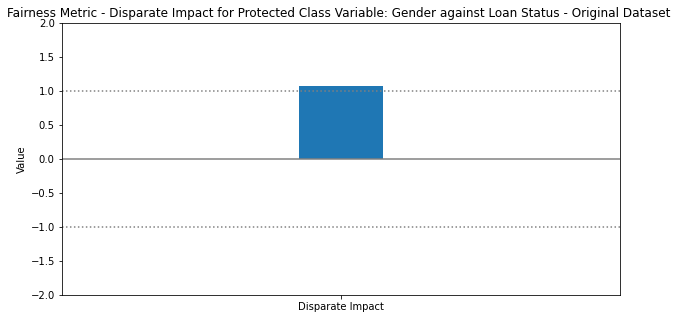

In [109]:
#Disparate Impact on predicted for Gender:  1.075268817204301
# creating the dataset
data = {'Disparate Impact':1.07526}
metric = list(data.keys())
value = list(data.values())
  
fig_DispImpact_Gender_OriginalDataset = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Disparate Impact for Protected Class Variable: Gender against Loan Status - Original Dataset ")
plt.show()

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


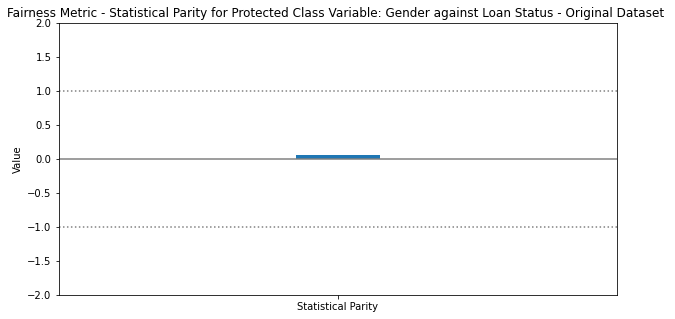

In [110]:
#Statistical Parity on predicted for Gender:  0.05833333333333335
# creating the dataset
data = {'Statistical Parity':0.05833}
metric = list(data.keys())
value = list(data.values())
  
fig_StatParity_Gender_OriginalDataset = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Statistical Parity for Protected Class Variable: Gender against Loan Status - Original Dataset ")
plt.show()

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


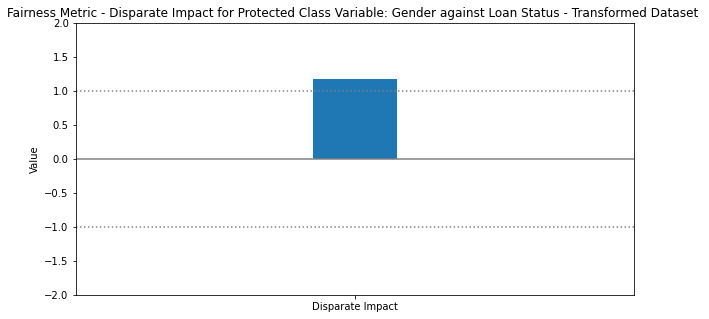

In [111]:
#Disparate Impact on predicted for Gender - transformed dataset:  1.1797752808988764
# creating the dataset
data = {'Disparate Impact':1.17977}
metric = list(data.keys())
value = list(data.values())
  
fig_DispImpact_Gender_TransformedDataset = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Disparate Impact for Protected Class Variable: Gender against Loan Status - Transformed Dataset ")
plt.show()

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


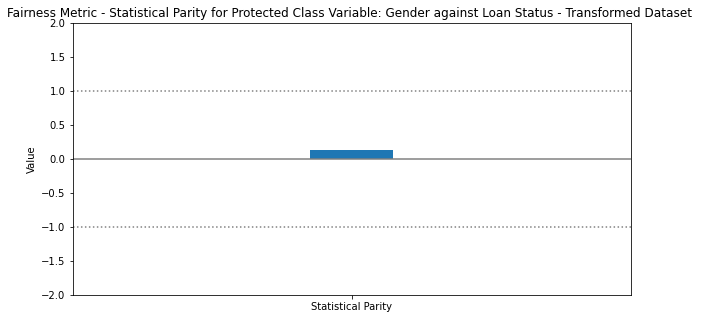

In [112]:
#Statistical Parity on predicted for Gender - transformed dataset:  0.1333333333333333
# creating the dataset
data = {'Statistical Parity':0.13333}
metric = list(data.keys())
value = list(data.values())
  
fig_StatParity_Gender_TransformedDataset = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
#plt.xlabel("Disparate Impact")
plt.ylim([-2, 2])
plt.xlim([-1, 1])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.title("Fairness Metric - Statistical Parity for Protected Class Variable: Gender against Loan Status - Transformed Dataset ")
plt.show()

#### 4.6)  For each fairness metric, in table format, discuss if there were any differences in the outcomes for the privileged versus unprivileged group. Was there a positive change, negative change, or no change on that fairness metric after transforming the dataset earlier in Step 3.4? Was there a positive change, negative change, or no change on that fairness metric after applying your bias mitigation algorithm - with respect to the original testing dataset and the transformed testing dataset? [Note: Use your subjective opinion]

**Dependent Variable:** Loan Status <br> 
**Protected Class:** Gender <br>
**Privileged:** Male; Unprivileged: Female <br>

**Disparate Impact**<br>
The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group.
Fairness for this metric is between 0.8 and 1.25


| Dataset | Original | Transformed | Change |
| ----------- | ----------- | ----------- | ----------- |
| All | 0.953850430914651 | 1.1928934010152286 | Original dataset was in fairness range for this metric. Higher benefit to unprivileged group after transformation, however still in the fairness range. |
| After Training Classifier | 1.075268817204301 | 1.1797752808988764 | Original dataset was in fairness range for this metric. Small increase in benefit to unprivileged group after transformation, however still in the fairness range.|

**Statistical Parity**<br>
The ideal value of this metric is 0 <br>
Fairness for this metric is between -0.1 and 0.1

| Dataset | Original | Transformed | Change |
| ----------- | ----------- | ----------- | ----------- | 
| All | -0.03240288893226628 | 0.11409439464305005 | Original dataset metric value was within the fairness range of this metric. For transformed dataset, it crosses the fairness boundary and became slightly unfair > 0.1 |
| After Training Classifier | 0.05833333333333335 | 0.1333333333333333 | Original dataset metric value was within the fairness range of this metric. For transformed dataset, it crosses the fairness boundary and became slightly unfair > 0.1. |

# Step 5

#### 5.2) Graph the results from applying the two fairness metrics on your privileged/unprivileged groups as derived from Step 3.2, 3.4, and 4.5 

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


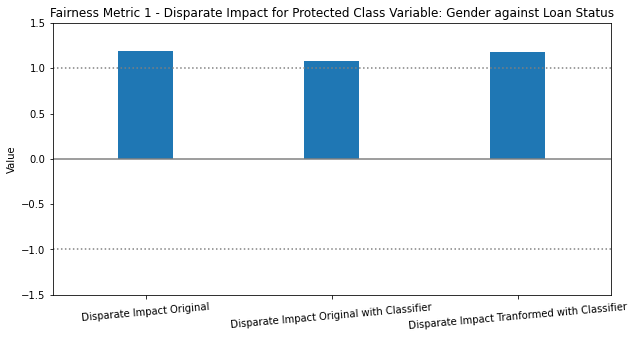

In [113]:
#Disparate Impact on predicted for Gender:  1.075268817204301
# creating the dataset
data = {'Disparate Impact Original':1.19289,'Disparate Impact Original with Classifier':1.07526, 'Disparate Impact Tranformed with Classifier':1.17977}
metric = list(data.keys())
value = list(data.values())
  
fig_DispImpact_Gender_OriginalDataset = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
plt.ylim([-1.5, 1.5])
plt.xlim([-0.5, 2.5])
plt.ylabel("Value")
plt.axhline(1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(-1, color = 'gray', linestyle = 'dotted')
plt.xticks(rotation = 5)
plt.title("Fairness Metric 1 - Disparate Impact for Protected Class Variable: Gender against Loan Status")
plt.show()

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


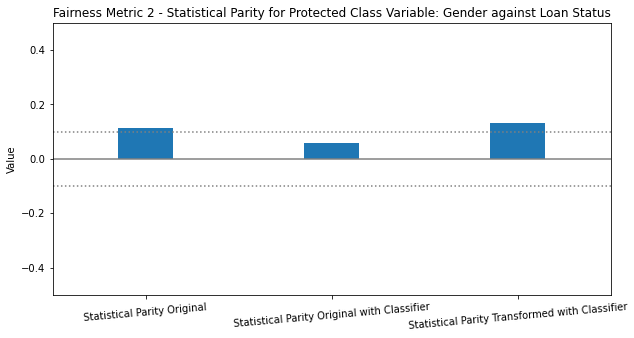

In [114]:
#Statistical Parity on predicted for Gender:  0.05833333333333335
# creating the dataset
data = {'Statistical Parity Original':0.11409, 'Statistical Parity Original with Classifier':0.05833, 'Statistical Parity Transformed with Classifier': 0.13333}
metric = list(data.keys())
value = list(data.values())
  
fig_StatParity_Gender_OriginalDataset = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(metric, value, width = 0.3)
 
plt.ylim([-0.5, 0.5])
plt.xlim([-0.5, 2.5])
plt.ylabel("Value")
plt.axhline(-0.1, color = 'gray', linestyle = 'dotted')
plt.axhline(0, color = 'gray')
plt.axhline(0.1, color = 'gray', linestyle = 'dotted')
plt.xticks(rotation = 5)
plt.title("Fairness Metric 2 - Statistical Parity for Protected Class Variable: Gender against Loan Status")
plt.show()

#### 5.3) Explain which fairness metric (if any) is best and provide a justification for your answer, Each team member must provide a separate answer to the following questions in no-more than a one-paragraph response (this is to be included in the submitted group report, with a reference to the student author). Note: If a group member fails to provide a response, the team is free to indicate that in the final report submission with No Response and a reference to the student author. Did any of these approaches seems to work to mitigate bias (or increase fairness)? Explain your reasoning. Did any group receive a positive advantage? Was any group disadvantaged by these approaches? What issues would arise if you used these methods to mitigate bias?

### **Luis Antonio De Los Heros Beunza (lbeunza3):** <br>
Given that disparate impact measures the ratio of unprivileged to privileged and statistical parity measures the difference in the ratios, after comparing the numbers in the summary table, my conclusion is that the approaches taken to mitigate bias were not sufficient and led to overcompensation of the privilege to unprivileged ratio therefore not assisting with fairness. Originally, we observed the unprivileged category to be at a disadvantage by minimal figures (privileged -male ratio of a loan status equals to yes was 70% and unprivileged - female was 67% making disparate impact at 95%), however when we applied our fairness metrics, we observed the opposite, making the privileged at a disadvantage. Some issues that would arise if these methods would be utilized are that we might have confusion as to which group is really at a disadvantage and we may act against the unprivileged making the situation even worse than when having original bias.